# **Import Library:** 분석에 사용할 모듈 설치

In [1]:
!pip install --upgrade pip
!python -m pip install --user --upgrade pip
!pip install xgboost --user --upgrade
!pip install lightgbm --user --upgrade
!pip install catboost --user --upgrade
!pip install mlxtend --user --upgrade

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text, export_graphviz
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import plot_importance as plot_importance_xgb
from lightgbm import plot_importance as plot_importance_lgbm
from catboost import Pool, CatBoostClassifier
from mlxtend.classifier import StackingClassifier, StackingCVClassifier
from mlxtend.plotting import plot_decision_regions

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn import metrics
# for classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

## 사용자 정의 함수

In [3]:
from module_classification import *

# **Base Algorithm:** Logistic Regression

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
Effect of X..


,features,coef,odds
0,Measure1,1.86,6.45
1,Measure2,2.76,15.74
2,Measure3,3.14,23.19
3,Measure4,3.32,27.80
4,Measure5,-4.82,0.01


Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00      6837
     class 1       0.00      0.00      0.00        62

    accuracy                           0.99      6899
   macro avg       0.50      0.50      0.50      6899
weighted avg       0.98      0.99      0.99      6899

ROC Curve: Test


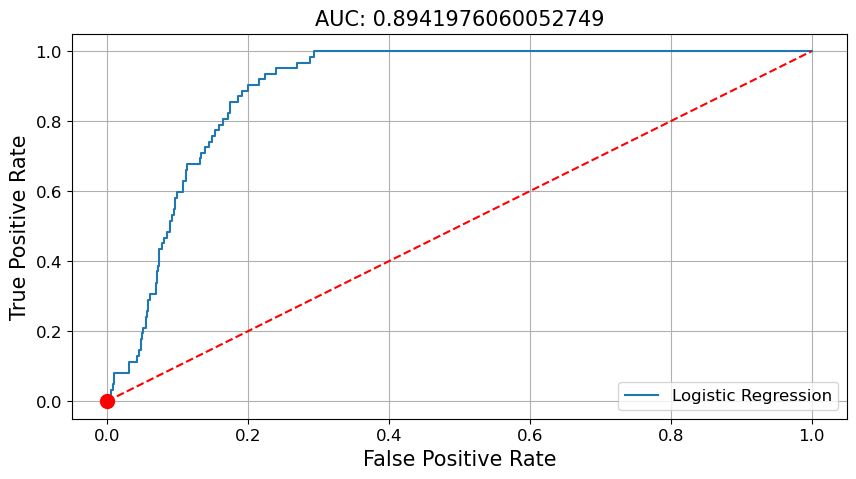

,Accuracy,AUC
Train,0.99,0.88
Test,0.99,0.89


In [4]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Logistic Regression
model_logitreg = LogisticRegression(fit_intercept=True)
model_logitreg.fit(X_train, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train.columns,
                      'coef': model_logitreg.coef_[0],
                      'odds': np.exp(model_logitreg.coef_[0])}))

# 예측
Y_trpred = model_logitreg.predict(X_train)
Y_tepred = model_logitreg.predict(X_test)
P_trpred = model_logitreg.predict_proba(X_train)
P_tepred = model_logitreg.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_logitreg = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_logitreg

# **Advanced Algorithm:** Regularization

## Ridge

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
Effect of X..


,features,coef,odds
0,const,-4.44,0.01
1,Measure1,0.99,2.70
2,Measure2,1.07,2.93
3,Measure3,1.14,3.13
4,Measure4,-1.12,0.33
5,Measure5,-1.96,0.14


Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00      6837
     class 1       0.00      0.00      0.00        62

    accuracy                           0.99      6899
   macro avg       0.50      0.50      0.50      6899
weighted avg       0.98      0.99      0.99      6899

ROC Curve: Test


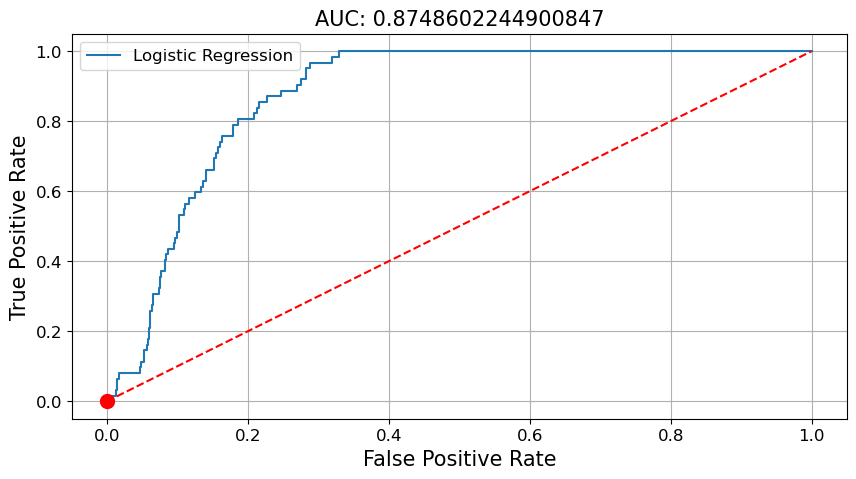

,Accuracy,AUC
Train,0.99,0.87
Test,0.99,0.87


In [5]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Logistic Regression
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model_ridge = LogisticRegression(fit_intercept=False, 
                                 penalty='l2', C=0.1)
model_ridge.fit(X_train, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train.columns,
                      'coef': model_ridge.coef_[0],
                      'odds': np.exp(model_ridge.coef_[0])}))

# 예측
Y_trpred = model_ridge.predict(X_train)
Y_tepred = model_ridge.predict(X_test)
P_trpred = model_ridge.predict_proba(X_train)
P_tepred = model_ridge.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_ridge = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_ridge

## Lasso

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
Effect of X..


,features,coef,odds
0,const,-6.64,0.00
1,Measure1,0.00,1.00
2,Measure2,0.00,1.00
3,Measure3,5.46,235.42
4,Measure4,0.00,1.00
5,Measure5,0.00,1.00


Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00      6837
     class 1       0.00      0.00      0.00        62

    accuracy                           0.99      6899
   macro avg       0.50      0.50      0.50      6899
weighted avg       0.98      0.99      0.99      6899

ROC Curve: Test


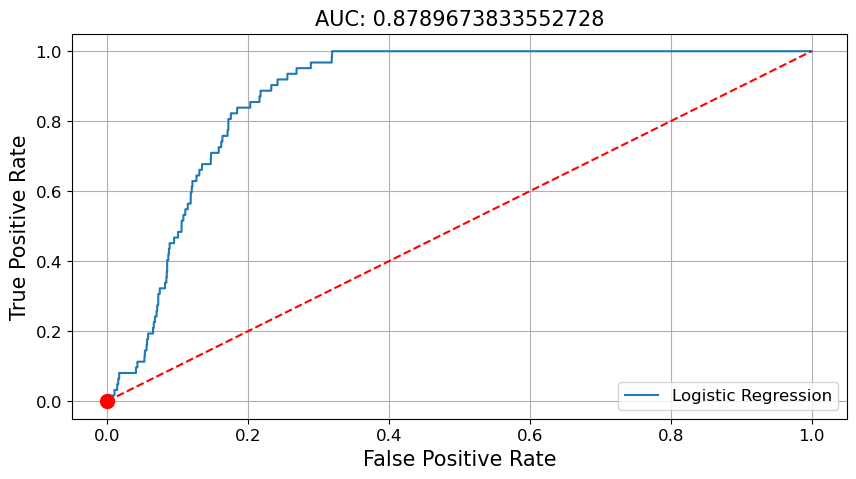

,Accuracy,AUC
Train,0.99,0.86
Test,0.99,0.88


In [6]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Logistic Regression
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model_lasso = LogisticRegression(fit_intercept=False, 
                                 penalty='l1', C=0.1, solver='saga')
model_lasso.fit(X_train, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train.columns,
                      'coef': model_lasso.coef_[0],
                      'odds': np.exp(model_lasso.coef_[0])}))

# 예측
Y_trpred = model_lasso.predict(X_train)
Y_tepred = model_lasso.predict(X_test)
P_trpred = model_lasso.predict_proba(X_train)
P_tepred = model_lasso.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_lasso = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_lasso

## Elastic Net

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
Effect of X..


,features,coef,odds
0,const,-5.07,0.01
1,Measure1,1.15,3.14
2,Measure2,1.31,3.70
3,Measure3,1.43,4.16
4,Measure4,-0.29,0.75
5,Measure5,-1.95,0.14


Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00      6837
     class 1       0.00      0.00      0.00        62

    accuracy                           0.99      6899
   macro avg       0.50      0.50      0.50      6899
weighted avg       0.98      0.99      0.99      6899

ROC Curve: Test


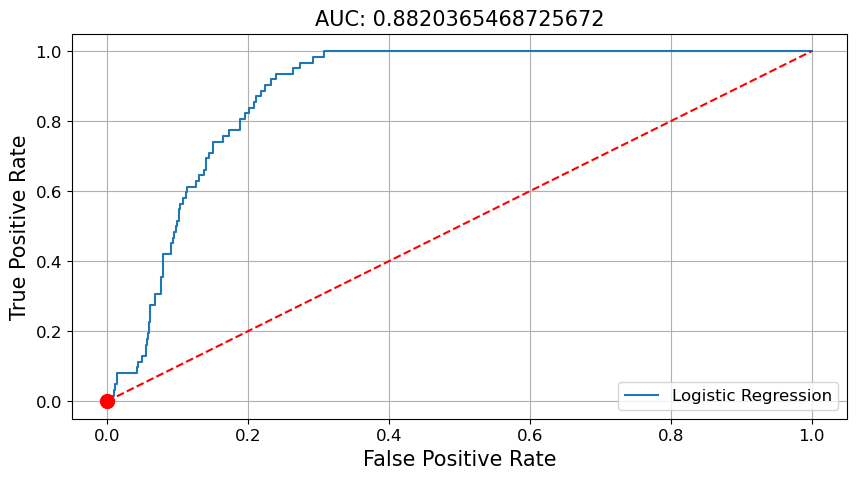

,Accuracy,AUC
Train,0.99,0.87
Test,0.99,0.88


In [7]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Logistic Regression
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model_en = LogisticRegression(fit_intercept=False, 
                              penalty='elasticnet', C=0.1, l1_ratio=0.5, solver='saga')
model_en.fit(X_train, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train.columns,
                      'coef': model_en.coef_[0],
                      'odds': np.exp(model_en.coef_[0])}))

# 예측
Y_trpred = model_en.predict(X_train)
Y_tepred = model_en.predict(X_test)
P_trpred = model_en.predict_proba(X_train)
P_tepred = model_en.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_en = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_en

# **Advanced Algorithm:** Voting

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00      6837
     class 1       0.89      0.13      0.23        62

    accuracy                           0.99      6899
   macro avg       0.94      0.56      0.61      6899
weighted avg       0.99      0.99      0.99      6899

ROC Curve: Test


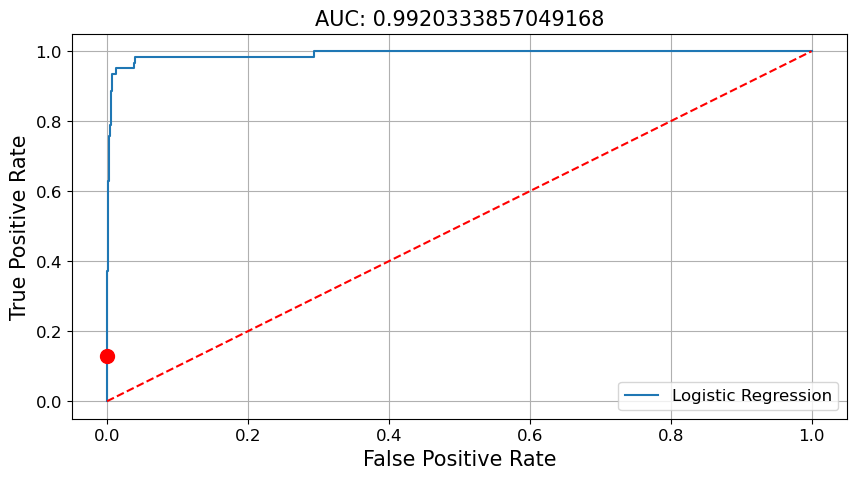

,Accuracy,AUC
Train,0.99,1.00
Test,0.99,0.99


In [8]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Voting
## Weak Learners
model_logitreg = LogisticRegression()
model_knn = KNeighborsClassifier()
clf = [('LR', model_logitreg), ('KNN', model_knn)]
voting_type = 'soft'
model_voting = VotingClassifier(estimators=clf, voting=voting_type)
model_voting.fit(X_train, Y_train)

# 예측
Y_trpred = model_voting.predict(X_train)
Y_tepred = model_voting.predict(X_test)
P_trpred = model_voting.predict_proba(X_train)
P_tepred = model_voting.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_voting = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_voting

# **Advanced Algorithm:** Bagging

##  Decision Tree

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
변수 중요도: 


,Importance
Measure1,0.01
Measure2,0.01
Measure3,0.21
Measure4,0.43
Measure5,0.35


Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.85      0.84      0.85        62

    accuracy                           1.00      6899
   macro avg       0.93      0.92      0.92      6899
weighted avg       1.00      1.00      1.00      6899

ROC Curve: Test


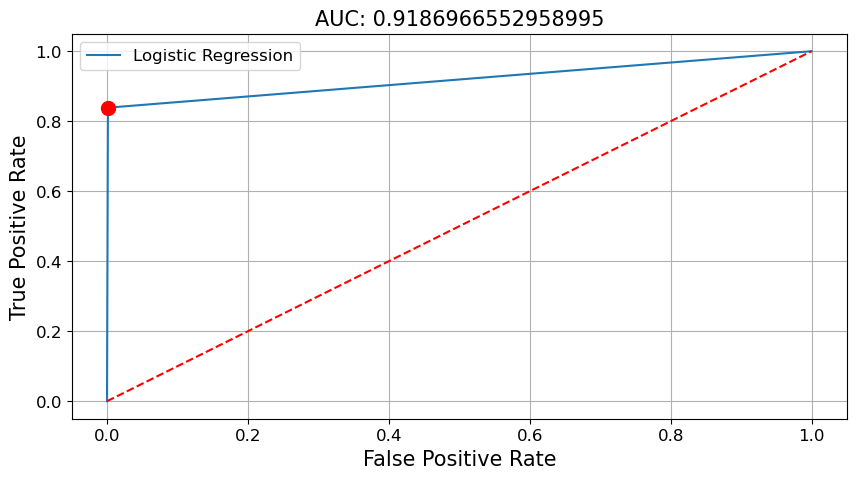

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,0.92


In [9]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Decision Tree
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=123)
model_dt.fit(X_train, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_dt.feature_importances_, 
                     index=model_dt.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_dt.predict(X_train)
Y_tepred = model_dt.predict(X_test)
P_trpred = model_dt.predict_proba(X_train)
P_tepred = model_dt.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_dt = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_dt

## Random Forest

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
변수 중요도: 


,Importance
Measure1,0.09
Measure2,0.08
Measure3,0.09
Measure4,0.41
Measure5,0.33


Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       1.00      0.65      0.78        62

    accuracy                           1.00      6899
   macro avg       1.00      0.82      0.89      6899
weighted avg       1.00      1.00      1.00      6899

ROC Curve: Test


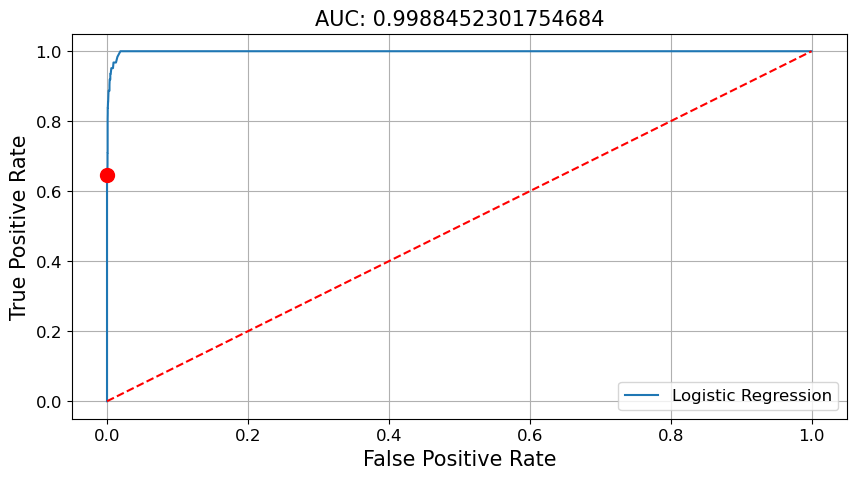

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,1.00


In [10]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=123)
model_rf.fit(X_train, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_rf.feature_importances_, 
                     index=model_rf.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_rf.predict(X_train)
Y_tepred = model_rf.predict(X_test)
P_trpred = model_rf.predict_proba(X_train)
P_tepred = model_rf.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_rf = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_rf

## Random Forest with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
최적 하이퍼 파라미터:  {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
변수 중요도: 


,Importance
Measure1,0.07
Measure2,0.07
Measure3,0.07
Measure4,0.47
Measure5,0.33


Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.93      0.45      0.61        62

    accuracy                           0.99      6899
   macro avg       0.96      0.73      0.80      6899
weighted avg       0.99      0.99      0.99      6899

ROC Curve: Test


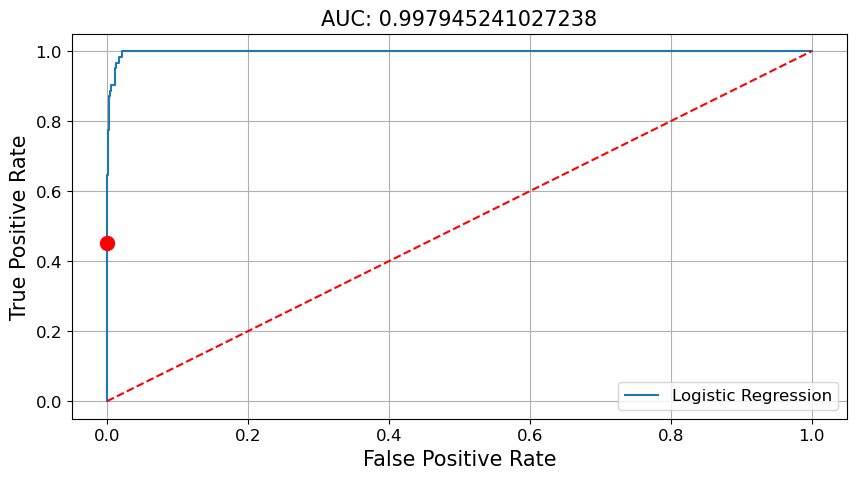

,Accuracy,AUC
Train,1.00,1.00
Test,0.99,1.00


In [11]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Random Forest
model_rf = RandomForestClassifier(random_state=123)
params = {'n_estimators': [100],  
          'max_depth': [5, 7, 9],   
          'min_samples_leaf': [5, 7, 9],   
          'min_samples_split': [5, 7, 9]} 
model_rf_cv = GridSearchCV(estimator=model_rf, param_grid=params, 
                           cv=5,   
                           n_jobs=-1)   
model_rf_cv.fit(X_train, Y_train)
print("최적 하이퍼 파라미터: ", model_rf_cv.best_params_)

model_rf_cv_final = RandomForestClassifier(**model_rf_cv.best_params_)
model_rf_cv_final.fit(X_train, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_rf_cv_final.feature_importances_, 
                     index=model_rf_cv_final.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_rf_cv_final.predict(X_train)
Y_tepred = model_rf_cv_final.predict(X_test)
P_trpred = model_rf_cv_final.predict_proba(X_train)
P_tepred = model_rf_cv_final.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_rf_cv_final = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_rf_cv_final

# **Advanced Algorithm:** Boosting

## Gradient Boosting

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
변수 중요도: 


,Importance
Measure1,0.05
Measure2,0.05
Measure3,0.06
Measure4,0.53
Measure5,0.31


Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.73      0.71      0.72        62

    accuracy                           1.00      6899
   macro avg       0.87      0.85      0.86      6899
weighted avg       0.99      1.00      1.00      6899

ROC Curve: Test


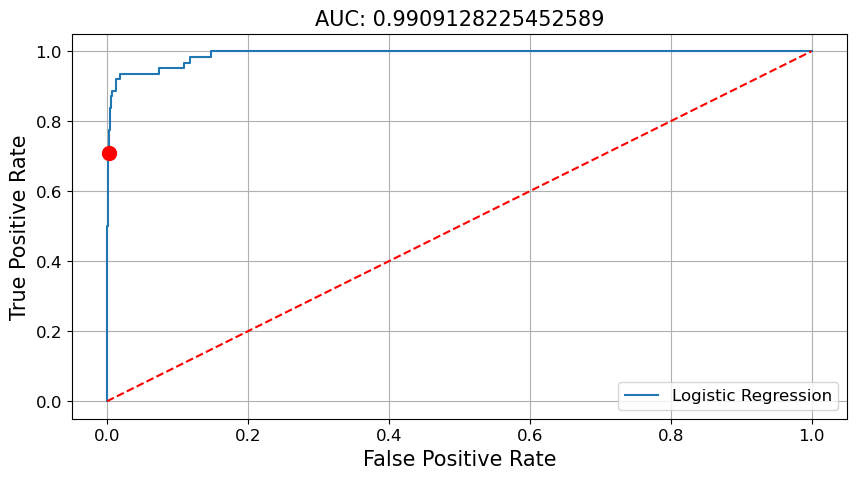

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,0.99


In [12]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Gradient Boosting
model_gb = GradientBoostingClassifier(n_estimators=100,
                                      learning_rate=0.1,
                                      max_depth=3, random_state=123)
model_gb.fit(X_train, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_gb.feature_importances_, 
                     index=model_gb.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_gb.predict(X_train)
Y_tepred = model_gb.predict(X_test)
P_trpred = model_gb.predict_proba(X_train)
P_tepred = model_gb.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_gb = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_gb

## GBM with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
최적 하이퍼 파라미터:  {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
변수 중요도: 


,Importance
Measure1,0.08
Measure2,0.04
Measure3,0.04
Measure4,0.51
Measure5,0.34


Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.89      0.76      0.82        62

    accuracy                           1.00      6899
   macro avg       0.94      0.88      0.91      6899
weighted avg       1.00      1.00      1.00      6899

ROC Curve: Test


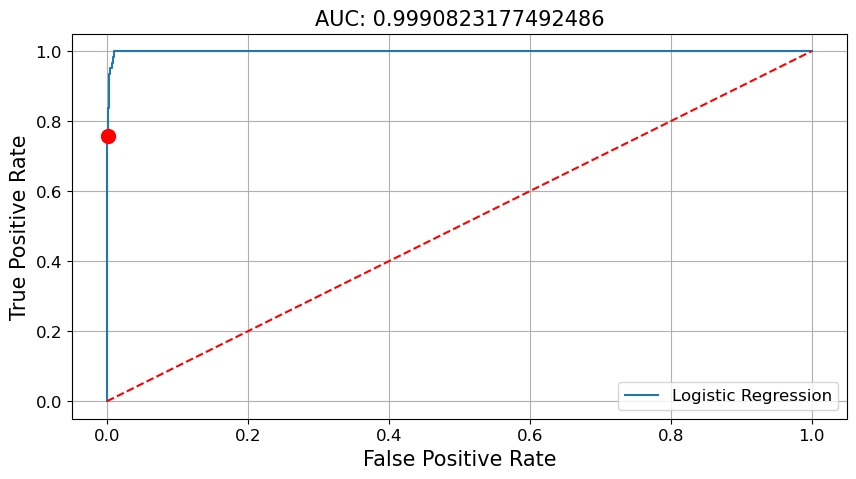

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,1.00


In [13]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Gradient Boosting
model_gb = GradientBoostingClassifier()
params = {'n_estimators': [100],   
          'max_depth': [5, 7, 9],    
          'min_samples_leaf': [5, 7, 9],   
          'min_samples_split': [5, 7, 9]}   
model_gb_cv = GridSearchCV(estimator=model_gb, param_grid=params, 
                           cv=5,   
                           n_jobs=-1)   
model_gb_cv.fit(X_train, Y_train)
print("최적 하이퍼 파라미터: ", model_gb_cv.best_params_)

model_gb_cv_final = GradientBoostingClassifier(**model_gb_cv.best_params_)
model_gb_cv_final.fit(X_train, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_gb_cv_final.feature_importances_, 
                     index=model_gb_cv_final.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_gb_cv_final.predict(X_train)
Y_tepred = model_gb_cv_final.predict(X_test)
P_trpred = model_gb_cv_final.predict_proba(X_train)
P_tepred = model_gb_cv_final.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_gb_cv_final = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_gb_cv_final

## XGBoost

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
변수 중요도(분류기준): 


,Importance
Measure1,0.08
Measure2,0.05
Measure3,0.28
Measure4,0.42
Measure5,0.18


변수 중요도(성능기준): 
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.93      0.66      0.77        62

    accuracy                           1.00      6899
   macro avg       0.96      0.83      0.89      6899
weighted avg       1.00      1.00      1.00      6899

ROC Curve: Test


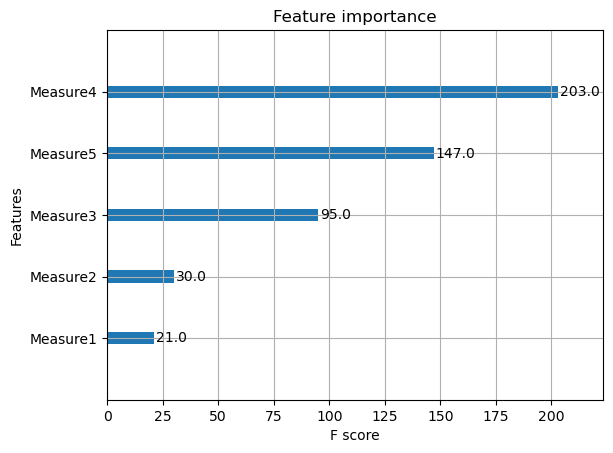

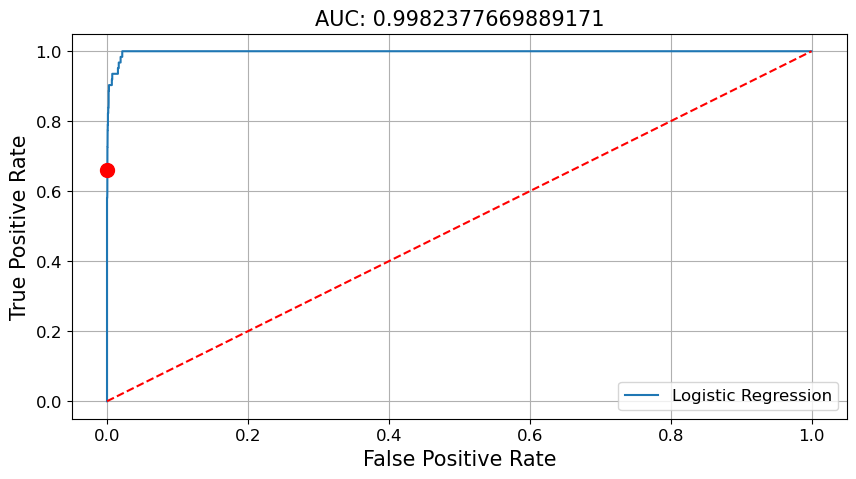

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,1.00


In [14]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# XGBoost
model_xgb = XGBClassifier(n_estimators=100,
                          learning_rate=0.1,
                          max_depth=3, random_state=123,
                          eval_metric='mlogloss')
model_xgb.fit(X_train, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_xgb.feature_importances_, 
                     index=model_xgb.feature_names_in_, columns=['Importance']))
print("변수 중요도(성능기준): ")
plot_importance_xgb(model_xgb)

# 예측
Y_trpred = model_xgb.predict(X_train)
Y_tepred = model_xgb.predict(X_test)
P_trpred = model_xgb.predict_proba(X_train)
P_tepred = model_xgb.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_xgb = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_xgb

## XGBoost with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
최적 하이퍼 파라미터:  {'eval_metric': 'mlogloss', 'gamma': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100}
변수 중요도(분류기준): 


,Importance
Measure1,0.04
Measure2,0.06
Measure3,0.25
Measure4,0.35
Measure5,0.30


변수 중요도(성능기준): 
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.92      0.79      0.85        62

    accuracy                           1.00      6899
   macro avg       0.96      0.89      0.93      6899
weighted avg       1.00      1.00      1.00      6899

ROC Curve: Test


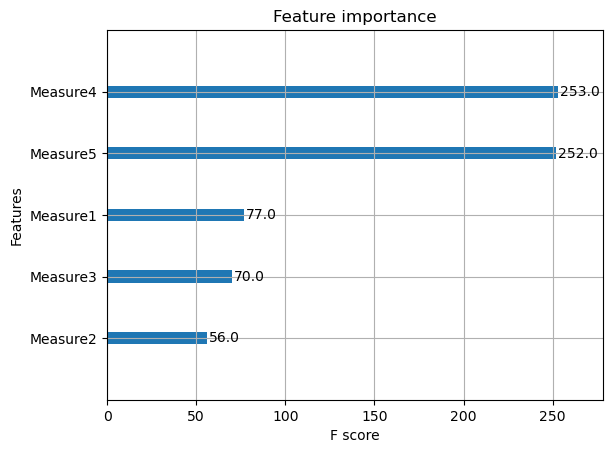

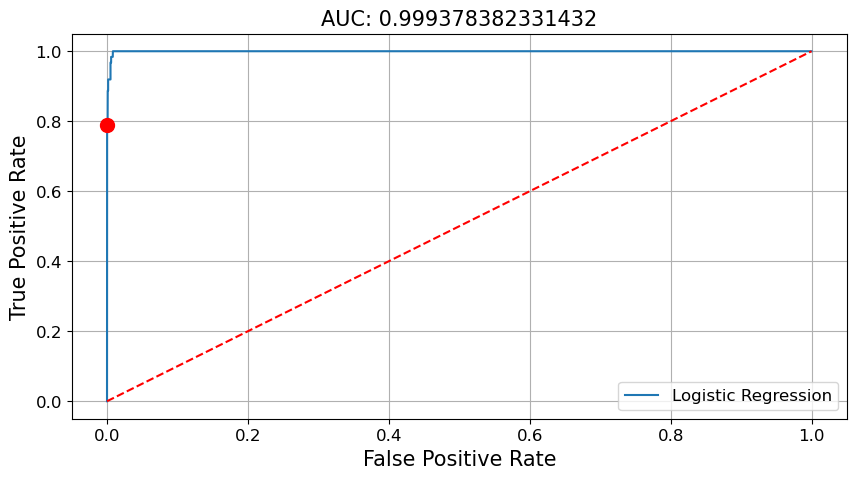

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,1.00


In [15]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# XGBoost
model_xgb = XGBClassifier()
params = {'n_estimators': [100],    
          'max_depth': [5, 7, 9],    
          'gamma': [0.1, 0.3, 0.5],   
          'min_child_weight': [5, 7, 9],    
          'eval_metric': ['mlogloss']}
model_xgb_cv = GridSearchCV(estimator=model_xgb, param_grid=params, 
                            cv=5,  
                            n_jobs=-1)    
model_xgb_cv.fit(X_train, Y_train)
print("최적 하이퍼 파라미터: ", model_xgb_cv.best_params_)

model_xgb_cv_final = XGBClassifier(**model_xgb_cv.best_params_)
model_xgb_cv_final.fit(X_train, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_xgb_cv_final.feature_importances_, 
                     index=model_xgb_cv_final.feature_names_in_, columns=['Importance']))
print("변수 중요도(성능기준): ")
plot_importance_xgb(model_xgb_cv_final)

# 예측
Y_trpred = model_xgb_cv_final.predict(X_train)
Y_tepred = model_xgb_cv_final.predict(X_test)
P_trpred = model_xgb_cv_final.predict_proba(X_train)
P_tepred = model_xgb_cv_final.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_xgb_cv_final = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_xgb_cv_final

## LightGBM

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
변수 중요도(분류기준): 


,Importance
Measure1,66
Measure2,18
Measure3,114
Measure4,213
Measure5,264


변수 중요도(성능기준): 
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.80      0.77      0.79        62

    accuracy                           1.00      6899
   macro avg       0.90      0.89      0.89      6899
weighted avg       1.00      1.00      1.00      6899

ROC Curve: Test


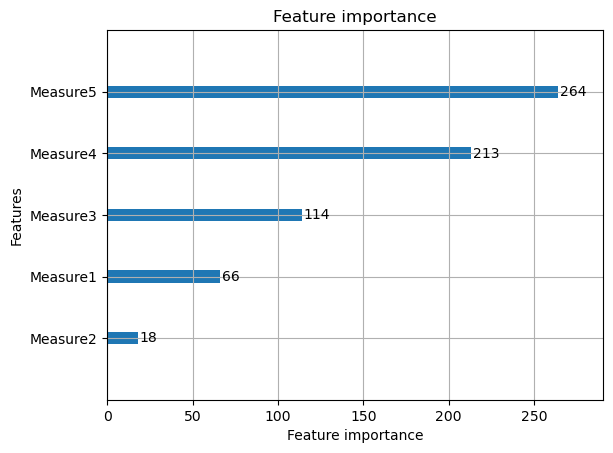

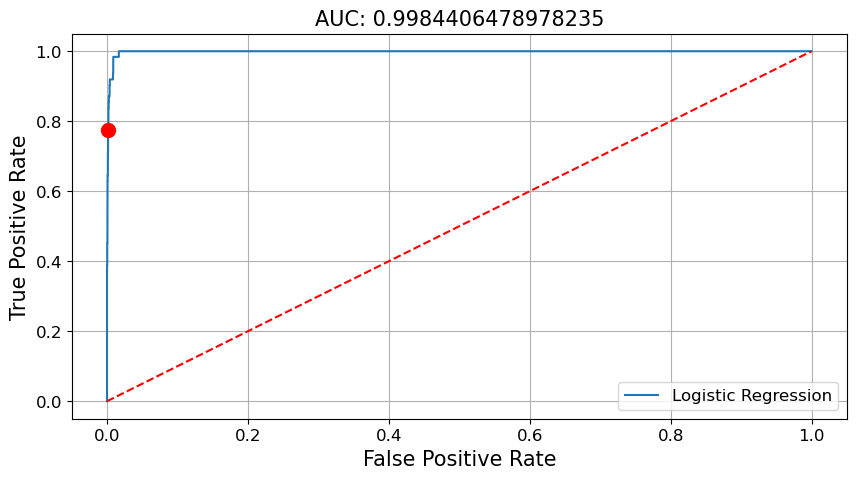

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,1.00


In [16]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# LightGBM
model_lgbm = LGBMClassifier(n_estimators=100,
                            learning_rate=0.1,
                            max_depth=3, random_state=123)
model_lgbm.fit(X_train, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_lgbm.feature_importances_, 
                     index=model_lgbm.feature_name_, columns=['Importance']))
print("변수 중요도(성능기준): ")
plot_importance_lgbm(model_lgbm)

# 예측
Y_trpred = model_lgbm.predict(X_train)
Y_tepred = model_lgbm.predict(X_test)
P_trpred = model_lgbm.predict_proba(X_train)
P_tepred = model_lgbm.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_lgbm = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_lgbm

## LightGBM with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
[LightGBM] [Warning] Unknown parameter: gamma
최적 하이퍼 파라미터:  {'gamma': 0.1, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 100}
변수 중요도(분류기준): 


,Importance
Measure1,55
Measure2,35
Measure3,74
Measure4,346
Measure5,324


변수 중요도(성능기준): 
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.93      0.82      0.87        62

    accuracy                           1.00      6899
   macro avg       0.96      0.91      0.94      6899
weighted avg       1.00      1.00      1.00      6899

ROC Curve: Test


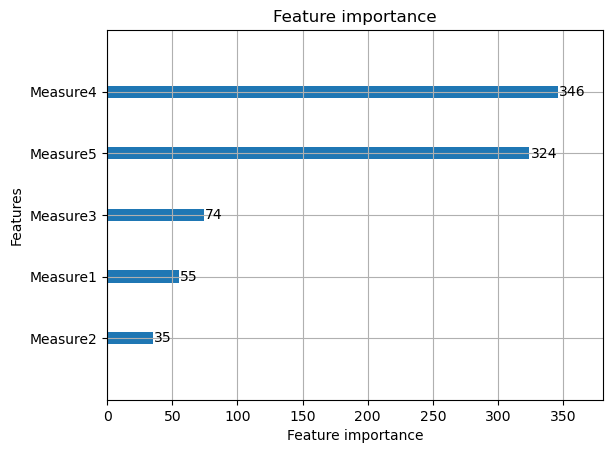

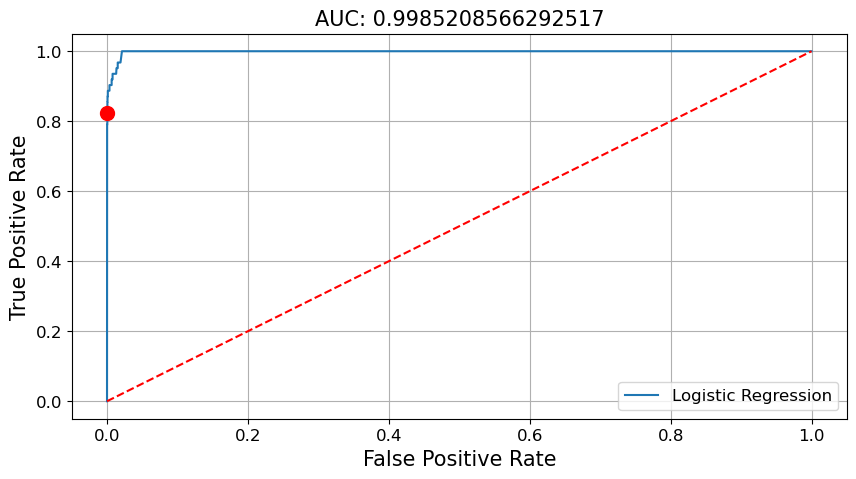

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,1.00


In [17]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# LightGBM
model_lgbm = LGBMClassifier()
params = {'n_estimators': [100],    
          'max_depth': [5, 7, 9],   
          'gamma': [0.1, 0.3, 0.5],   
          'min_child_weight': [5, 7, 9]}    
model_lgbm_cv = GridSearchCV(estimator=model_lgbm, param_grid=params, 
                             cv=5,    
                             n_jobs=-1)     
model_lgbm_cv.fit(X_train, Y_train)
print("최적 하이퍼 파라미터: ", model_lgbm_cv.best_params_)

model_lgbm_cv_final = LGBMClassifier(**model_lgbm_cv.best_params_)
model_lgbm_cv_final.fit(X_train, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_lgbm_cv_final.feature_importances_, 
                     index=model_lgbm_cv_final.feature_name_, columns=['Importance']))
print("변수 중요도(성능기준): ")
plot_importance_lgbm(model_lgbm_cv_final)

# 예측
Y_trpred = model_lgbm_cv_final.predict(X_train)
Y_tepred = model_lgbm_cv_final.predict(X_test)
P_trpred = model_lgbm_cv_final.predict_proba(X_train)
P_tepred = model_lgbm_cv_final.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_lgbm_cv_final = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_lgbm_cv_final

## CatBoost

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
변수 중요도(분류기준): 


,Importance
Measure1,10.35
Measure2,15.93
Measure3,10.07
Measure4,28.26
Measure5,35.39


변수 중요도(성능기준): 
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.97      0.47      0.63        62

    accuracy                           1.00      6899
   macro avg       0.98      0.73      0.81      6899
weighted avg       0.99      1.00      0.99      6899

ROC Curve: Test


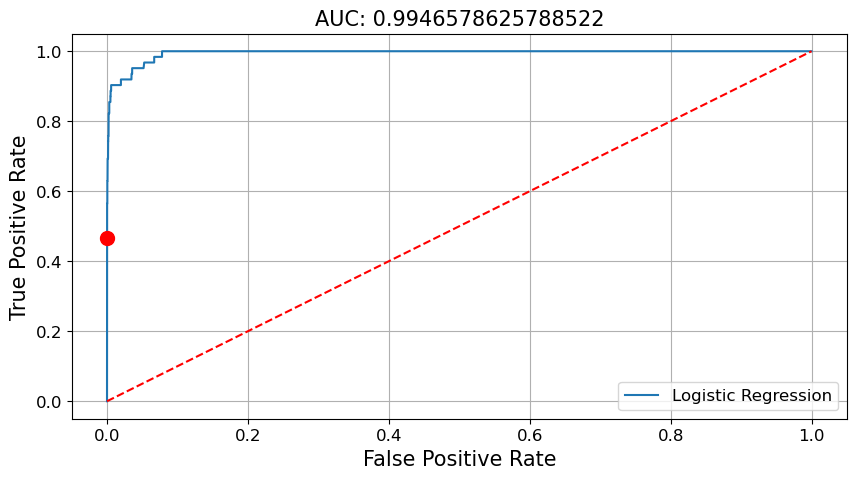

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,0.99


In [18]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# CatBoost
model_cb = CatBoostClassifier(n_estimators=100,
                              learning_rate=0.1,
                              max_depth=3, random_state=123,
                              verbose=0)
model_cb.fit(X_train, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_cb.feature_importances_, 
                     index=model_cb.feature_names_, columns=['Importance']))
print("변수 중요도(성능기준): ")

# 예측
Y_trpred = model_cb.predict(X_train)
Y_tepred = model_cb.predict(X_test)
P_trpred = model_cb.predict_proba(X_train)
P_tepred = model_cb.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_cb = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_cb

## CatBoost with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
최적 하이퍼 파라미터:  {'max_depth': 9, 'n_estimators': 100}
Learning rate set to 0.350894
0:	learn: 0.4139118	total: 14.1ms	remaining: 1.39s
1:	learn: 0.2736419	total: 27ms	remaining: 1.32s
2:	learn: 0.1900317	total: 41.3ms	remaining: 1.34s
3:	learn: 0.1345957	total: 54.7ms	remaining: 1.31s
4:	learn: 0.0978493	total: 69.6ms	remaining: 1.32s
5:	learn: 0.0734191	total: 84.1ms	remaining: 1.32s
6:	learn: 0.0581420	total: 100ms	remaining: 1.33s
7:	learn: 0.0454210	total: 117ms	remaining: 1.34s
8:	learn: 0.0370963	total: 133ms	remaining: 1.34s
9:	learn: 0.0300709	total: 148ms	remaining: 1.33s
10:	learn: 0.0249626	total: 163ms	remaining: 1.32s
11:	learn: 0.0215845	total: 178ms	remaining: 1.3s
12:	learn: 0.0189705	total: 193ms	remaining: 1.29s
13:	learn: 0.0171622	total: 213ms	remaining: 1.31s
14:	learn: 0.0156516	total: 241ms	remaining: 1.36s
15:	learn: 0.0143759	total: 275ms	remaining: 1.44s
16:	learn: 0.0135350	total: 305ms	remaining: 1.49s
17:	learn: 0.012

,Importance
Measure1,19.46
Measure2,10.84
Measure3,5.45
Measure4,27.25
Measure5,37.00


Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.96      0.81      0.88        62

    accuracy                           1.00      6899
   macro avg       0.98      0.90      0.94      6899
weighted avg       1.00      1.00      1.00      6899

ROC Curve: Test


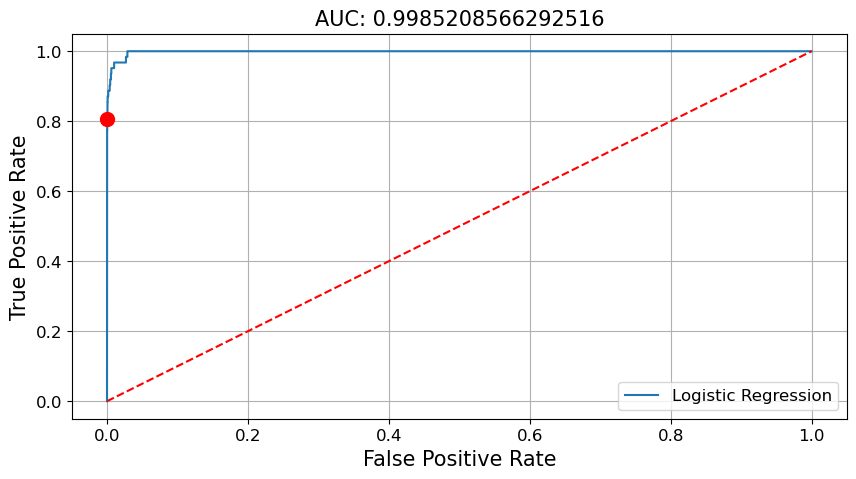

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,1.00


In [19]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# CatBoost
model_cb = CatBoostClassifier(verbose=0)
params = {'n_estimators': [100],    
          'max_depth': [5, 7, 9]}    
model_cb_cv = GridSearchCV(estimator=model_cb, param_grid=params, 
                           cv=5,    
                           n_jobs=-1)     
model_cb_cv.fit(X_train, Y_train)
print("최적 하이퍼 파라미터: ", model_cb_cv.best_params_)

model_cb_cv_final = CatBoostClassifier(**model_cb_cv.best_params_)
model_cb_cv_final.fit(X_train, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_cb_cv_final.feature_importances_, 
                     index=model_cb_cv_final.feature_names_, columns=['Importance']))

# 예측
Y_trpred = model_cb_cv_final.predict(X_train)
Y_tepred = model_cb_cv_final.predict(X_test)
P_trpred = model_cb_cv_final.predict_proba(X_train)
P_tepred = model_cb_cv_final.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_cb_cv_final = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_cb_cv_final

# **Advanced Algorithm:** Stacking

## Stacking

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.97      0.61      0.75        62

    accuracy                           1.00      6899
   macro avg       0.99      0.81      0.88      6899
weighted avg       1.00      1.00      1.00      6899

ROC Curve: Test


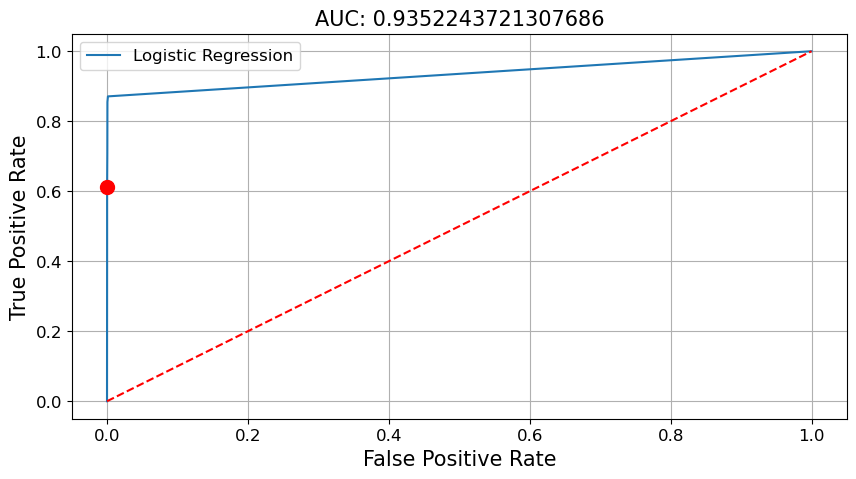

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,0.94


In [20]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Stacking
## Weak Learners
model_knn = KNeighborsClassifier()
model_svm = SVC()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier(eval_metric='mlogloss')

model_logitreg = LogisticRegression()
clf = [model_knn, model_svm, model_rf, model_xgb]
model_stack = StackingClassifier(classifiers=clf, 
                                 meta_classifier=model_logitreg)
model_stack.fit(X_train, Y_train)

# 예측
Y_trpred = model_stack.predict(X_train)
Y_tepred = model_stack.predict(X_test)
P_trpred = model_stack.predict_proba(X_train)
P_tepred = model_stack.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_stack = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_stack

## Stacking with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6837
     class 1       0.98      0.84      0.90        62

    accuracy                           1.00      6899
   macro avg       0.99      0.92      0.95      6899
weighted avg       1.00      1.00      1.00      6899

ROC Curve: Test


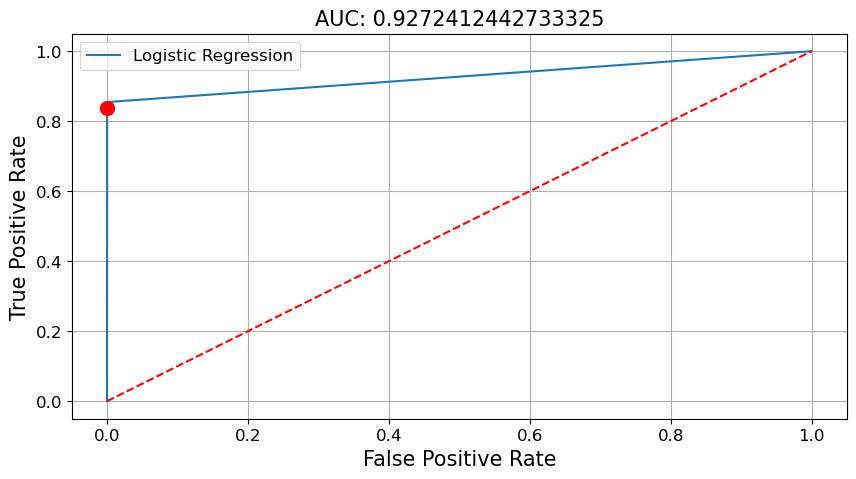

,Accuracy,AUC
Train,1.00,1.00
Test,1.00,0.93


In [21]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)
Y_train = (Y_train>=0.5).astype(int)
Y_test = (Y_test>=0.5).astype(int)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Stacking
## Weak Learners
model_knn = KNeighborsClassifier()
model_svm = SVC()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier(eval_metric='mlogloss')

model_logitreg = LogisticRegression()
clf = [model_knn, model_svm, model_rf, model_xgb]
model_stack = StackingCVClassifier(classifiers=clf, meta_classifier=model_logitreg)
params = {'kneighborsclassifier__n_neighbors': [5, 7],
          'svc__kernel': ['rbf'],
          'randomforestclassifier__n_estimators': [100],
          'randomforestclassifier__max_depth': [5, 7, 9],    
          'xgbclassifier__n_estimators': [100],    
          'xgbclassifier__max_depth': [5, 7, 9],
          'xgbclassifier__eval_metric': ['mlogloss']}
model_stack_cv = GridSearchCV(estimator=model_stack, param_grid=params, 
                              cv=5,  
                              n_jobs=-1)    
model_stack_cv.fit(X_train, Y_train)

# 예측
Y_trpred = model_stack_cv.predict(X_train)
Y_tepred = model_stack_cv.predict(X_test)
P_trpred = model_stack_cv.predict_proba(X_train)
P_tepred = model_stack_cv.predict_proba(X_test)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_stack_cv = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_stack_cv

# **Comparison**

,Accuracy,AUC
Logistic Regression,0.99,0.89
Ridge,0.99,0.87
Lasso,0.99,0.88
Elastic Net,0.99,0.88
Voting,0.99,0.99
Decision Tree,1.00,0.92
Random Forest,1.00,1.00
RF with CF,0.99,1.00
Gradient Boosting,1.00,0.99
GBM with CV,1.00,1.00


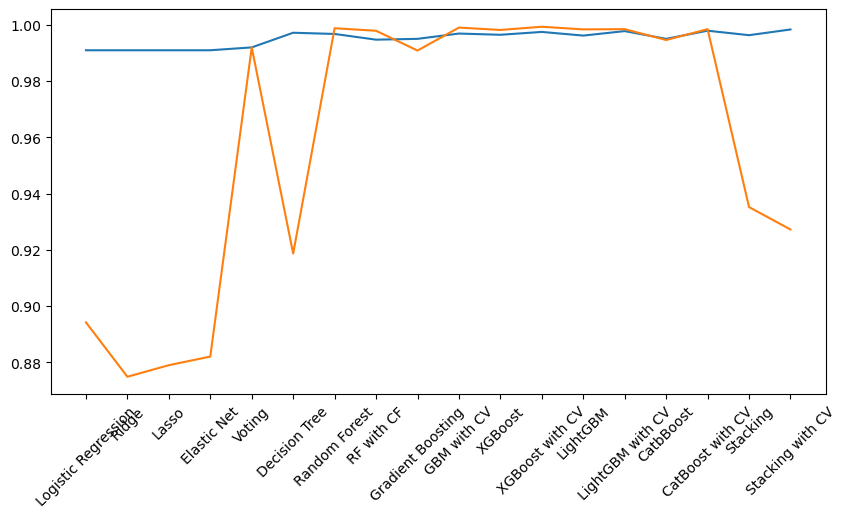

In [22]:
# 결과비교
labels = ['Logistic Regression', 'Ridge', 'Lasso', 'Elastic Net',
          'Voting', 'Decision Tree', 'Random Forest', 'RF with CF', 
          'Gradient Boosting', 'GBM with CV', 'XGBoost', 'XGBoost with CV', 
          'LightGBM', 'LightGBM with CV', 'CatbBoost', 'CatBoost with CV',
          'Stacking', 'Stacking with CV']
models = [Score_logitreg, Score_ridge, Score_lasso, Score_en,
          Score_voting, Score_dt,
          Score_rf, Score_rf_cv_final, Score_gb, Score_gb_cv_final,
          Score_xgb, Score_xgb_cv_final, Score_lgbm, Score_lgbm_cv_final, 
          Score_cb, Score_cb_cv_final, Score_stack, Score_stack_cv]
result_classification = pd.DataFrame()
for result in models:
    result_classification = pd.concat([result_classification, result.iloc[1:,:]], axis=0)
result_classification.index = labels
display(result_classification)

# 시각화
plt.figure(figsize=(10,5))
plt.plot(result_classification)
plt.xticks(rotation=45)
plt.show()